In [52]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.


In [54]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [55]:
# Parse the html with soup and create a Beautiful Soup Object
html = browser.html

html_soup = soup(html, 'html.parser')

table = html_soup.find('table')



In [56]:
# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [57]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows: 
     # Within each row, the find_all('td') function is used to find each cell
    cols = row.find_all('td') 

   # Strip any excess whitespace and returns a list of the cell values
    cols = [ele.text.strip() for ele in cols] 

    # The cleaned cell data is added to the data list (if not empty)
    data.append([ele for ele in cols if ele]) 



In [58]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns = ['id', 'terrestrial_date', 'sol', 'ls', 
                                   'month', 'min_temp', 'pressure'])

In [59]:
# Confirm DataFrame was created successfully
df = df.drop(0)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.


In [60]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [61]:
# Change data types for data analysis
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])



In [62]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [63]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f'Number of months on mars {num_months}')



Number of months on mars 12


In [64]:
# 2. How many Martian days' worth of data are there?
num_days = df['sol'].nunique()
print(f'Number of martian days worth of data = {num_days}')

Number of martian days worth of data = 1867


In [65]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby('month')['min_temp'].mean()

# Convert to a dataframe
avg_low_temp = pd.DataFrame(avg_low_temp)

# Change the month index to an integer and sort in ascending order
avg_low_temp.index = avg_low_temp.index.astype(int)
avg_low_temp.sort_index(inplace=True)
avg_low_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


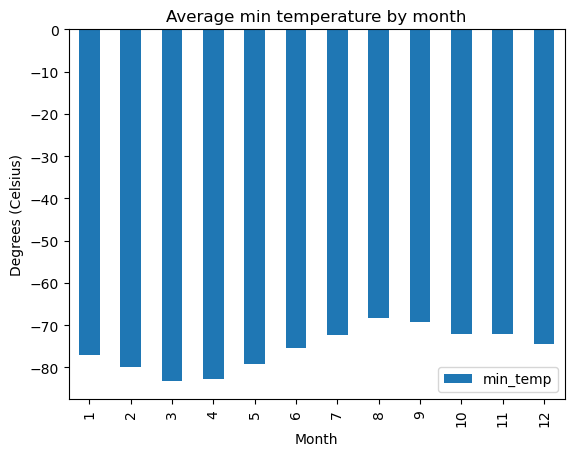

In [66]:
# Plot the average temperature by month

avg_low_temp.plot(kind='bar')

plt.title('Average min temperature by month')
plt.xlabel('Month')
plt.ylabel('Degrees (Celsius)')

plt.show()

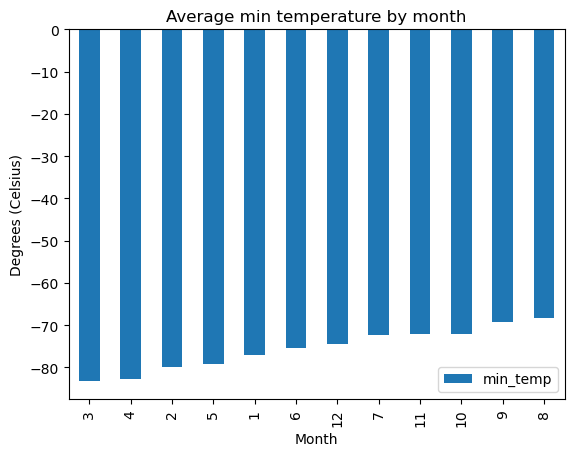

The coldest month is 3 and the hottest month is 8


In [67]:
# Identify the coldest and hottest months in Curiosity's location
cold_month = avg_low_temp['min_temp'].idxmin()
hot_month = avg_low_temp['min_temp'].idxmax()

avg_low_temp = avg_low_temp.sort_values('min_temp')
                                        
avg_low_temp.plot(kind='bar')

plt.title('Average min temperature by month')
plt.xlabel('Month')
plt.ylabel('Degrees (Celsius)')

plt.show()

print(f"The coldest month is {cold_month} and the hottest month is {hot_month}")

In [68]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()

# Convert to a dataframe
avg_pressure = pd.DataFrame(avg_pressure)

# Change the month index to an integer and sort in ascending order
avg_pressure.index = avg_pressure.index.astype(int)
avg_pressure.sort_index(inplace=True)
avg_pressure


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


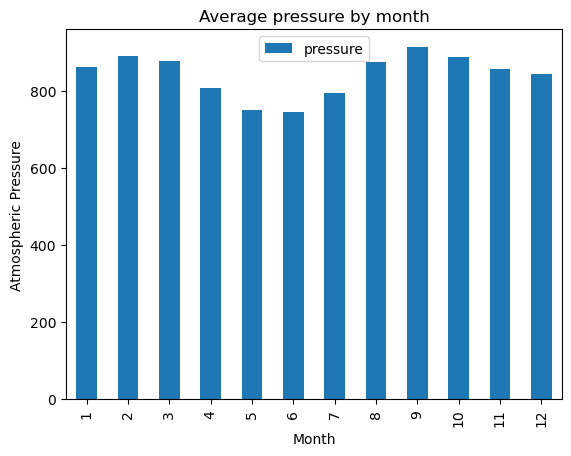

In [69]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')

plt.title('Average pressure by month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

plt.show()

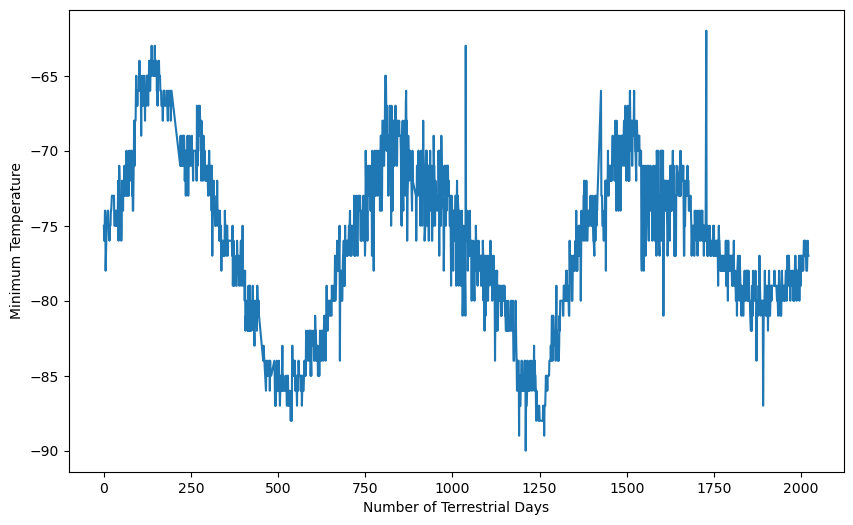

In [70]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['day_number'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

plt.figure(figsize=(10,6))
plt.plot(df['day_number'], df['min_temp'])

plt.xlabel('Number of Terrestrial Days')
plt.ylabel("Minimum Temperature")

plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [71]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [72]:
browser.quit()